In [1]:
%autosave 180
%load_ext autoreload
%autoreload 2

Autosaving every 180 seconds


In [2]:
import catboost
from catboost import CatBoostRanker, Pool, MetricVisualizer, cv
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
pd.set_option('display.max_colwidth', None)
import os
import gc
catboost.__version__

'1.0.5'

In [3]:
from features_dict import features
from utils import flatten_list
cols_to_use = flatten_list(features.values())
print(len(cols_to_use))
df = pd.read_csv('terrible_226feats_5tunes/outputs/shaps_df_trained_on_train_stopped_on_val.csv')
df[df['feature'].isin(cols_to_use)].sort_values('shap', ascending=True)#.head(50)

215


feature  \
149                                                                                                                                        booking_prob_train   
57                                                                                                                                       trip_start_date_week   
154                                                                                                                 max_price_per_day_per_srch_destination_id   
153                                                                                                                 min_price_per_day_per_srch_destination_id   
158                                                                                           price_per_day_diff_to_max_price_per_day_per_srch_destination_id   
211                                                                                     max_price_per_day_per_visitor_location_country_id_per_prop_country_id   
151                                                                                                                mean_price_per_day_per_srch_destination_id   
17                                                                                                                                        srch_children_count   
131                                                           price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id   
150                                                                                                                                          click_prob_train   
117                                                               price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter   
174                                                                   price_per_day_diff_to_max_price_per_day_per_prop_country_id_per_trip_start_date_quarter   
177                                                                     min_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter   
172                                                                  price_per_day_diff_to_mean_price_per_day_per_prop_country_id_per_trip_start_date_quarter   
176                                                                    mean_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter   
152                                                                                                              median_price_per_day_per_srch_destination_id   
119                                                                                                                     min_price_per_day_per_prop_country_id   
218                                                           price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_country_id   
145                                                                                           min_price_per_day_per_srch_destination_id_per_prop_review_score   
209                                                                                    mean_price_per_day_per_visitor_location_country_id_per_prop_country_id   
43                                                                                                                                       prop_star_review_sum   
147                                                                     price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_prop_review_score   
102                                  price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_location_score2   
77                                                                        price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_id   
198                                                               min_price_per_day_per_srch_destination_id_per_trip_start_da

In [55]:
df2 = pd.read_csv('friendly_stingray_245_feats_tune_2/outputs/shaps_df_trained_on_train_stopped_on_val.csv')
df2[df2['feature'].isin(cols_to_use)].sort_values('shap', ascending=True)#.head(50)

feature  \
155                                                                                                                                        booking_prob_train   
154                                                                                                                                            book_per_click   
66                                                                                                                                      trip_end_date_week_id   
59                                                                                                                                       trip_start_date_week   
160                                                                                                                 max_price_per_day_per_srch_destination_id   
60                                                                                                                      trip_start_date_week_mid_summer_index   
185                                                                    mean_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter   
179                                                                                         min_price_per_day_per_prop_country_id_per_trip_start_date_quarter   
63                                                                                                                                    trip_start_date_week_id   
17                                                                                                                                        srch_children_count   
187                                                                     min_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter   
164                                                                                           price_per_day_diff_to_max_price_per_day_per_srch_destination_id   
237                                                     min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter   
125                                                                                                                     max_price_per_day_per_prop_country_id   
184                                                               price_per_day_rel_diff_to_max_price_per_day_per_prop_country_id_per_trip_start_date_quarter   
183                                                                   price_per_day_diff_to_max_price_per_day_per_prop_country_id_per_trip_start_date_quarter   
206                               max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score   
172                                                                                             max_price_per_day_per_srch_destination_id_per_prop_starrating   
181                                                                  price_per_day_diff_to_mean_price_per_day_per_prop_country_id_per_trip_start_date_quarter   
128                                                                                           price_per_day_rel_diff_to_max_price_per_day_per_prop_country_id   
156                                                                                                                                          click_prob_train   
40                                                                                                                    price_per_trip_diff_to_place_hist_price   
234                                                           price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_country_id   
152                                                                                           max_price_per_day_per_srch_destination_id_per_prop_review_score   
163                                                                                       price_per_day_rel_diff_to_min_price

In [56]:
total_df = pd.merge(df, df2, on='feature')
total_df['shap_total'] = total_df['shap_x'] + total_df['shap_y']
total_df[total_df['feature'].isin(cols_to_use)].sort_values('shap_total', ascending=True)

feature  \
154                                                                                                                                            book_per_click   
155                                                                                                                                        booking_prob_train   
160                                                                                                                 max_price_per_day_per_srch_destination_id   
59                                                                                                                                       trip_start_date_week   
66                                                                                                                                      trip_end_date_week_id   
17                                                                                                                                        srch_children_count   
125                                                                                                                     max_price_per_day_per_prop_country_id   
63                                                                                                                                    trip_start_date_week_id   
60                                                                                                                      trip_start_date_week_mid_summer_index   
237                                                     min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter   
187                                                                     min_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter   
164                                                                                           price_per_day_diff_to_max_price_per_day_per_srch_destination_id   
183                                                                   price_per_day_diff_to_max_price_per_day_per_prop_country_id_per_trip_start_date_quarter   
185                                                                    mean_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter   
179                                                                                         min_price_per_day_per_prop_country_id_per_trip_start_date_quarter   
181                                                                  price_per_day_diff_to_mean_price_per_day_per_prop_country_id_per_trip_start_date_quarter   
184                                                               price_per_day_rel_diff_to_max_price_per_day_per_prop_country_id_per_trip_start_date_quarter   
128                                                                                           price_per_day_rel_diff_to_max_price_per_day_per_prop_country_id   
172                                                                                             max_price_per_day_per_srch_destination_id_per_prop_starrating   
122                                                               price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter   
157                                                                                                                mean_price_per_day_per_srch_destination_id   
234                                                           price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_country_id   
214                                                               max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score   
152                                                                                           max_price_per_day_per_srch_destination_id_per_prop_review_score   
206                               max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_da

In [4]:
from features_dict import features
from utils import flatten_list

cols_to_use = flatten_list(features.values())
len(cols_to_use)

215

In [5]:
from features_dict import CAT_FEATURES
CAT_FEATURES = [c for c in CAT_FEATURES if c in cols_to_use]
CAT_FEATURES

['srch_id',
 'site_id',
 'prop_country_id',
 'prop_id',
 'srch_destination_id',
 'trip_start_date_week',
 'trip_end_date_week_mid_summer_index']

In [4]:
from skopt import load

res_gp = load('cold_lionfish/outputs/skopt_results.pkl')
res_gp

          fun: -0.40273841875349725
    func_vals: array([-0.40213574, -0.40215342, -0.40174767, -0.40273842])
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1, 1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=2, noise='gaussian',
                         normalize_y=True, random_state=1608637542), GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1, 1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=2, noise='gaussian',
                         normalize_y=True, random_state=1608637542), GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1, 1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=2, noise='gaussian',
                         normalize_y=True, random_state=1608637542)]
 random_state: RandomState(MT19937) at 0x7FBA11B4A640
        space: Space([Integer(low=4, high=8, prior=

# Params

In [ ]:
# cols_to_use = (original_cols + booking_date_features + prop_location_score_features +
#                competitor_features + price_features +
#                trip_detail_features + aggregate_features + uncategorized_features +
#                star_features + price_star_features +

#                per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter +
#                per_visitor_location_country_id_per_prop_id +
#                per_day_per_prop_id_per_trip_start_date_quarter +
#                per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter +
#                #                per_visitor_location_country_id_per_srch_destination_id_per_prop_location_score2 +
#                price_per_day_per_visitor_location_country_id_per_prop_starrating +
#                per_srch_destination_id_per_srch_room_count_per_prop_review_score +
#                per_day_per_srch_destination_id_per_trip_start_date_quarter +
#                per_day_per_prop_country_id +
#                per_visitor_location_country_id_per_prop_review_score +
#                per_visitor_location_country_id_per_srch_destination_id +
#                per_prop_id +
#                per_day_per_srch_destination_id_per_prop_review_score +
#                per_trip_start_date_month +
#                per_day_per_trip_start_date_quarter +
#                target_features +
#                per_day_per_srch_destination_id +
#                per_srch_destination_id_per_prop_starrating +
#                per_day_per_prop_country_id_per_trip_start_date_quarter +
#                per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter +
#                per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating +
#                per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter +
#                per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score +
#                per_day_per_trip_start_date_month_per_srch_destination_id +
#                per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score +
#                per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score)

# len(cols_to_use)

In [6]:
assert len(cols_to_use) == len(set(cols_to_use)), 'some columns are duplicated'

In [7]:
# bool_cols = ['prop_brand_bool',
#              'promotion_flag',
#              'srch_saturday_night_bool',
#              'random_bool']

drop_cols = [
    'position',
    'click_bool',
    'gross_bookings_usd',
    'booking_bool',
    'train',
    'val',
    'test',
    'subm',
    'date_time',
] + [
#     'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
#     'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_id',
#     'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_id_per_trip_start_date_quarter',
#     'price_index_per_srch_destination_id',
#     'price_per_day_diff_to_mean_price_per_day_per_prop_id_per_trip_start_date_quarter',
#     'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_id_per_trip_start_date_quarter',
#     'price_per_day_rel_diff_to_mean_price_per_day_per_prop_id_per_trip_start_date_quarter',
#     'mean_price_per_day_per_visitor_location_country_id_per_prop_starrating',
#     'price_per_day_rel_diff_to_min_price_per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter',
#     'price_per_day_rel_diff_to_mean_price_per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter',
#     'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
#     'price_per_day_rel_diff_to_max_price_per_day_per_prop_id_per_trip_start_date_quarter',
#     'price_usd',
    'date',
 'trip_start_date',
 'trip_end_date',
#     'booking_prob_train', 'click_prob_train', 'book_per_click',
#     'prop_location_score2', 'price_index_per_srch_id',
#        'prop_location_score_sum_log',
#        'price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
#        'price_per_day_rel_diff_to_median_price_per_day_per_prop_id',
#        'price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
#        'price_per_day_rel_diff_to_mean_price_per_day_per_prop_id',
#        'price_per_star',
#        'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
#        'prop_star_review_min', 'prop_star_review_mean',
#        'prop_location_score_mul_log',
#        'price_per_day_rel_diff_to_min_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
#        'price_per_day_diff_to_mean_price_per_day_per_prop_id',
#        'price_per_day_diff_to_mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
#        'prop_star_review_max',
#        'median_price_per_day_per_visitor_location_country_id_per_prop_starrating',
#        'mean_price_per_day_per_visitor_location_country_id_per_prop_starrating',
#        'price_per_day_rel_diff_to_min_price_per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter'
]

group_col = 'srch_id'
predict_item_col = 'prop_id'

DROP_DATETIME_TYPE = True

# Read data

In [5]:
data_path = 'data'

In [6]:
# # 15.05.2022 Oleg: for feature listing purposes. Do not used in modeling

# X_val = pd.read_feather(os.path.join(data_path, 'X_val.feather'))

# cols = X_val.columns.to_list()
# cols = [c for c in cols if 'per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter' not in c]
# cols = [c for c in cols if 'per_day_per_visitor_location_country_id_per_prop_id' not in c]
# # cols = [c for c in cols if 'per_day_per_prop_id_per_trip_start_date_quarter' not in c]
# # cols = [c for c in cols if 'per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter' not in c]
# # cols = [c for c in cols if 'per_visitor_location_country_id_per_srch_destination_id_per_prop_location_score2' not in c]
# # cols = [c for c in cols if 'price_per_day_per_visitor_location_country_id_per_prop_starrating' not in c]
# # cols = [c for c in cols if 'per_srch_destination_id_per_srch_room_count_per_prop_review_score' not in c]
# # cols = [c for c in cols if not c.endswith('per_day_per_srch_destination_id_per_trip_start_date_quarter')]
# # cols = [c for c in cols if not c.endswith('per_day_per_prop_country_id')]
# # cols = [c for c in cols if not c.endswith('per_visitor_location_country_id_per_prop_review_score')]
# # cols = [c for c in cols if not c.endswith('per_visitor_location_country_id_per_srch_destination_id')]
# # cols = [c for c in cols if not c.endswith('per_prop_id')]
# # cols = [c for c in cols if 'per_day_per_srch_destination_id_per_prop_review_score' not in c]
# # cols = [c for c in cols if not c.endswith('per_trip_start_date_month')]
# # cols = [c for c in cols if not c.endswith('per_day_per_trip_start_date_quarter')]
# # cols = [c for c in cols if not c.endswith('per_srch_destination_id_per_prop_starrating')]
# # cols = [c for c in cols if not c.endswith('per_day_per_prop_country_id_per_trip_start_date_quarter')]
# # cols = [c for c in cols if not c.endswith('per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter')]
# # cols = [c for c in cols if not c.endswith('per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating')]
# # cols = [c for c in cols if not c.endswith('per_day_per_srch_destination_id')]
# # cols = [c for c in cols if not c.endswith('per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter')]
# # cols = [c for c in cols if not c.endswith('per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score')]
# # cols = [c for c in cols if not c.endswith('per_day_per_trip_start_date_month_per_srch_destination_id')]
# # cols = [c for c in cols if not c.endswith('per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score')]
# # cols = [c for c in cols if not c.endswith('per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score')]
# # cols = [c for c in cols if not c.endswith('per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating')]
# # cols = [c for c in cols if 'prop_location_score2' not in c]
# # cols = [c for c in cols if 'per_day_per_visitor_location_country_id_per_prop_country_id' not in c]
# # cols = [c for c in cols if 'per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter' not in c]
# print(len(cols))
# # [c for c in cols if 'per_day_per_srch_destination_id_per_prop_review_score' in c]
# [c for c in cols if c.endswith('per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score')]
# # [c for c in cols if c.startswith('trip_start_date')]
# # sorted([c for c in cols if c not in cols_to_use])
# # [c for c in cols if c not in registered_features]


In [8]:
X_train = pd.read_feather(os.path.join(data_path, 'X_train.feather'))#, columns=cols_to_use)
X_train = X_train[[c for c in X_train.columns if c not in drop_cols]]
y_train = pd.read_feather(os.path.join(data_path, 'y_train.feather'))['target']
print('X_train.shape', X_train.shape)
X_train.head()

X_train.shape (39536, 462)


index  srch_id  site_id  visitor_location_country_id  \
0   6001        8        5                          219   
1   6000        8        5                          219   
2  16472       28        5                          219   
3  37152       30       24                          216   
4  85183       44       15                           55   

   visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
0                      NaN                   NaN              219    35397   
1                      NaN                   NaN              219    66444   
2                      NaN                   NaN              219    35767   
3                      NaN                   NaN              219    68689   
4                      NaN                   NaN               55    55904   

   prop_starrating  prop_review_score  prop_brand_bool  prop_location_score1  \
0              3.0                4.5                1                  1.39   
1              4.0                4.5                1                  1.39   
2              4.0                4.5                1                  1.61   
3              3.0                3.5                1                  4.72   
4              5.0                5.0                0                  4.16   

   prop_location_score2  prop_log_historical_price   price_usd  \
0                0.1000                       4.82  119.000000   
1                   NaN                       5.34  239.000000   
2                0.0229                       5.35   95.000000   
3                0.4450                       5.36  157.520004   
4                0.0021                       5.89  188.740005   

   promotion_flag  srch_destination_id  srch_length_of_stay  \
0               1                 7082                    1   
1               0                 7082                    1   
2               1                24232                    3   
3               1                20319                    9   
4               0                24752                    1   

   srch_booking_window  srch_adults_count  srch_children_count  \
0                    0                  1                    0   
1                    0                  1                    0   
2                   27                  1                    0   
3                   13                  2                    0   
4                    1                  1                    0   

   srch_room_count  srch_saturday_night_bool  srch_query_affinity_score  \
0                1                         0                        NaN   
1                1                         0                        NaN   
2                1                         0                        NaN   
3                1                         0                        NaN   
4                1                         0                        NaN   

   orig_destination_distance  random_bool  price_per_day  price_per_trip  \
0                       5.07            0     119.000000      119.000000   
1                       1.41            0     239.000000      239.000000   
2                     115.00            0      95.000000      285.000000   
3                        NaN            0     157.520004     1417.680054   
4                        NaN            0     188.740005      188.740005   

   date_time_ordinal  prop_location_score_diff  prop_location_score_sum  \
0              46008                    1.2900                   1.4900   
1              46008                       NaN                      NaN   
2               7338                    1.5871                   1.6329   
3              30978                    4.2750                   5.1650   
4              45543                    4.1579                   4.1621   

   prop_location_score_mul  prop_location_score_diff_log  \
0                 0.139000                      4.711914   
1                      NaN                    

In [9]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [10]:
y_train.value_counts()

0    37723
5     1114
1      699
Name: target, dtype: int64

In [11]:
X_train.memory_usage().sum() / 1024**2

66.47309875488281

In [12]:
# # makes sure all features are categorized
# assert set() == set(X_train.columns) - set(original_cols + booking_date_features + prop_location_score_features + competitor_features + price_features + historical_price_features + trip_detail_features + aggregate_features + uncategorized_features)

In [13]:
X_train.dtypes.value_counts()#.apply(lambda x: x.name).to_dict()

float32    424
int8        23
int16        7
int32        5
int64        1
uint8        1
bool         1
dtype: int64

In [14]:
[c for c in X_train.columns if c in drop_cols or 'date' in c]

['date_time_ordinal',
 'trip_start_date_week',
 'trip_start_date_week_mid_summer_index',
 'trip_start_date_month',
 'trip_start_date_days_in_month',
 'trip_start_date_quarter',
 'trip_start_date_season_num',
 'trip_start_date_year',
 'trip_start_date_week_id',
 'trip_end_date_week',
 'trip_end_date_week_mid_summer_index',
 'trip_end_date_month',
 'trip_end_date_days_in_month',
 'trip_end_date_quarter',
 'trip_end_date_season_num',
 'trip_end_date_year',
 'trip_end_date_week_id',
 'mean_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
 'median_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
 'min_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
 'max_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
 'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_

In [15]:
train_pool = Pool(data=X_train, 
                  label=y_train,
                  group_id=X_train[group_col],
#                   cat_features=X_train.select_dtypes(include=['category']).columns.tolist(),
                  )
# del X_train, y_train; gc.collect()

In [16]:
X_val = pd.read_feather(os.path.join(data_path, 'X_val.feather'))#, columns=cols_to_use)
X_val = X_val[[c for c in X_val.columns if c not in drop_cols]]

y_val = pd.read_feather(os.path.join(data_path, 'y_val.feather'))['target']    
print('X_val.shape', X_val.shape)

X_val.shape (4949, 462)


In [17]:
y_val.value_counts()

0    4705
5     169
1      75
Name: target, dtype: int64

In [18]:
[c for c in X_val.columns if c in drop_cols or 'date_time' in c]

['date_time_ordinal']

In [19]:
val_pool = Pool(data=X_val,
                label=y_val,
                group_id=X_val[group_col],
#                 cat_features=X_val.select_dtypes(include=['category']).columns.tolist(),
                )

# del X_val, y_val; gc.collect()

# Fit final model

In [20]:
gc.collect()

15

In [26]:
params = {
    "iterations": 100,
    'loss_function': 'YetiRank', # YetiRank should be faster # hints=skip_train~false
    'custom_metric': ['NDCG:top=5;type=Base;denominator=LogPosition;hints=skip_train~false'], 
    "verbose": False,
#     'early_stopping_rounds': 50,
    'use_best_model': False,
#     'metric_period': 50,
#     "task_type": "GPU",
}

In [27]:
model = CatBoostRanker(**params)
model.fit(train_pool, eval_set=val_pool, plot=True, verbose_eval=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [33]:
model.tree_count_

100

In [20]:
model.save_model('catboost_model')

In [ ]:
from IPython.display import FileLink
FileLink(r'catboost_model')

In [ ]:
!zip -r catboost_info.zip /kaggle/working/catboost_info/

# Eval

In [12]:
# I run this locally as don't have enough capacity to train
model = CatBoostRanker()
model.load_model('trained_models/catboost_model', format='cbm')

In [22]:
model.is_fitted()

True

In [27]:
cols_to_use = model.feature_names_
len(cols_to_use)

398

In [ ]:
# from catboost.utils import eval_metric
# In ranking tasks it is not necessary to predict the same labels.
# It is important to predict the right order of objects.
# eval_metric(labels, good_predictions, 'NDCG:top=5;type=Base;denominator=LogPosition', 
#             group_id=group_ids)

In [407]:
print(model.eval_metrics(val_pool,
                         'NDCG:top=5;type=Base;denominator=LogPosition',
                         ntree_start=model.tree_count_-1))
# del val_pool; gc.collect()

{'NDCG:top=5;type=Base': [0.9953353924118316]}


In [408]:
print(model.eval_metrics(train_pool,
                         'NDCG:top=5;type=Base;denominator=LogPosition',
                         ntree_start=model.tree_count_-1))

# del train_pool; gc.collect()

{'NDCG:top=5;type=Base': [0.9958545675292894]}


In [128]:
X_test = pd.read_feather(os.path.join(data_path, 'X_test_small.feather'))#, columns=cols_to_use)
y_test = pd.read_feather(os.path.join(data_path, 'y_test_small.feather'))['target']
# X_test = pd.read_feather(os.path.join('../Personalize-Expedia-Hotel-Searches/data/', 'X_test_small.feather'), columns=cols_to_use)
# y_test = pd.read_feather(os.path.join('../Personalize-Expedia-Hotel-Searches/data/', 'y_test_small.feather'))['target']

print('X_test.shape', X_test.shape)

test_pool = Pool(data=X_test.drop('date_time', axis=1),
                label=y_test,
                group_id=X_test[group_col],
                cat_features=X_test.select_dtypes(include=['category']).columns.tolist(),
                )

print(model.eval_metrics(test_pool,
                         'NDCG:top=5;type=Base;denominator=LogPosition',
                         ntree_start=model.tree_count_-1))

del X_test, y_test, test_pool; gc.collect()

X_test.shape (27322, 466)
{'NDCG:top=5;type=Base': [0.9745234884147391]}


38

# Retrain the model on train+val, with test set as eval. The hyper parameters are frozen!  

Uncomment at the end of the competition

In [ ]:
train_val_pool = Pool(data=pd.concat([X_train, X_val], axis=0),
                      label=pd.concat([y_train, y_val], axis=0),
                      group_id=pd.concat([X_train, X_val], axis=0)[group_col],
                      cat_features=CAT_FEATURES,
                      )

In [ ]:
del X_train, X_val, y_train, y_val; gc.collect()

In [ ]:
X_test = pd.read_feather(os.path.join(data_path, 'X_test.feather'), columns=cols_to_use)
y_test = pd.read_feather(os.path.join(data_path, 'y_test.feather'))['target']
test_pool = Pool(data=X_test,
                label=y_test,
                group_id=X_test[group_col],
                cat_features=CAT_FEATURES,
                )
del X_test, y_test; gc.collect()

In [ ]:
params["iterations"] += 1000

model = CatBoostRanker(**params)
model.fit(train_val_pool, eval_set=test_pool, plot=False, verbose_eval=True)

In [ ]:
model.save_model('catboost_model')

# Make preds

In [6]:
# I run this locally as don't have enough capacity to train
model = CatBoostRanker()
model.load_model('large_tuning_400feats_sour_yak_1/outputs/catboost_model_train_val', format='cbm')

In [8]:
def predict_in_format(model, data, pool, group_col, predict_item_col, gt_col=None):
    preds = model.predict(pool)

    values = {group_col: data[group_col],
              predict_item_col: data[predict_item_col],
              'pred': preds}

    values_df = pd.DataFrame(values)
    values_df.sort_values(by=[group_col, 'pred'], ascending=[True, False], inplace=True)

    if gt_col is not None:
        values_df['gt'] = gt_col
        ndcg_score = values_df.groupby(group_col)['gt'].apply(ndcg, at=5).mean()
        print('Local test NDCG@5:', ndcg_score)

    return values_df

In [15]:
subm_df = pd.read_feather(os.path.join(
    data_path, 'submission_df_preprocessed.feather'), columns=cols_to_use)
subm_df.sort_values([group_col], inplace=True)

In [20]:
subm_name = 'submission_19'
subm_filename = f'submissions/{subm_name}.csv'
subm_scores_filename = f'submissions/{subm_name}_scores.csv'

In [18]:
from utils import prepare_cats
prepare_cats(subm_df, CAT_FEATURES)

In [19]:
subm_pool = Pool(
    data=subm_df,
    group_id=subm_df[group_col],
    cat_features=CAT_FEATURES,
)

output_df = predict_in_format(model, subm_df, subm_pool, group_col, predict_item_col)
del subm_df, subm_pool; gc.collect()
output_df.head(10)

srch_id prop_id      pred
23       1   99484  3.080002
9        1   54937  2.781211
5        1   28181  2.651430
12       1   61934  2.534519
22       1   95031  2.388750
4        1   24194  2.277967
6        1   34263  2.225679
18       1   82231  2.092725
1        1    5543  1.977024
8        1   50162  1.944626

In [22]:
output_df.to_csv(subm_scores_filename, index=False)
output_df[[group_col, 'prop_id']].to_csv(subm_filename, index=False)
del output_df; gc.collect()
pd.read_csv(subm_filename, nrows=10)

srch_id  prop_id
0        1    99484
1        1    54937
2        1    28181
3        1    61934
4        1    95031
5        1    24194
6        1    34263
7        1    82231
8        1     5543
9        1    50162

In [4]:
# use locally or if you added the sample subm file to the dataset
def validate_submission(subm_sample_path, our_subm_path):
    
    subm_sample = pd.read_csv(subm_sample_path)
    our_subm = pd.read_csv(our_subm_path)
    
    assert subm_sample.shape == our_subm.shape
    assert our_subm[group_col].equals(subm_sample[group_col])
    assert our_subm.index.equals(subm_sample.index)
    assert subm_sample.groupby(group_col)['prop_id'].apply(len).to_frame().equals(
        our_subm.groupby(group_col)['prop_id'].apply(len).to_frame())
    print('everything is ok to submit')
    
validate_submission(os.path.join(data_path, 'submission_sample.csv'),
                    subm_filename)

NameError: name 'os' is not defined

# Feature importance

In [48]:
del train_pool; gc.collect()

NameError: name 'train_pool' is not defined

In [109]:
cols_to_use = ['srch_id',
               'site_id',
               'visitor_hist_starrating',
               'visitor_hist_adr_usd',
               'prop_country_id',
               'prop_id',
               'prop_starrating',
               'prop_review_score',
               'prop_brand_bool',
               'prop_location_score1',
               'prop_location_score2',
               'prop_log_historical_price',
               'price_usd',
               'promotion_flag',
               'srch_destination_id',
               'srch_booking_window',
               'srch_children_count',
               'srch_saturday_night_bool',
               'srch_query_affinity_score',
               'orig_destination_distance',
               'random_bool',
               'comp2_rate_percent_diff',
               'comp3_rate_percent_diff',
               'comp5_rate_percent_diff',
               'date_time_ordinal',
               'prop_location_score_diff',
               'prop_location_score_sum',
               'prop_location_score_mul',
               'prop_location_score_diff_log',
               'prop_location_score_sum_log',
               'prop_location_score_mul_log',
               'ratio_of_comp_with_higher_price_than_expedia',
               'ratio_of_comp_with_lower_price_than_expedia',
               'comp5_rate_percent_diff_signed',
               'comp8_rate_percent_diff_signed',
               'price_per_day',
               'price_usd_log_10',
               'visitor_hist_adr_usd_pow_0.5',
               'prop_log_historical_price_pow_0.33',
               'prop_log_historical_price_log_10',
               'prop_log_historical_price_reciprocal',
               'price_diff_to_usr_hist',
               'price_ratio_to_usr_hist',
               'price_diff_to_place_hist_price',
               'travel_inside',
               'booking_weeks_ahead',
               'len_of_stay_to_booking_ahead_ratio',
               'children_per_adult',
               'people_per_room',
               'separate_children_room',
               'trip_start_date',
               'trip_start_date_week',
               'trip_start_date_week_mid_summer_index',
               'trip_start_date_month',
               'trip_start_date_days_in_month',
               'trip_start_date_season_num',
               'trip_start_date_week_id',
               'price_index_per_srch_id',
               'price_index_per_srch_destination_id',
               'price_index_per_prop_id',
               'srch_query_affinity_score_prob',
               'prop_star_usr_hist_diff',
               'prop_review_usr_hist_diff',
               'prop_starrating_bonus_chain',
               'prop_star_review_sum',
               'prop_star_review_diff',
               'prop_star_review_min',
               'prop_star_review_max',
               'prop_star_review_mean',
               'price_per_star',
               'price_per_review_score',
               'price_per_star_log_10',
               'price_per_review_score_log_10',
               'usr_price_per_star_log_10',
               'price_per_day_diff_to_mean_price_per_day_per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_min_price_per_day_per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter',
               'mean_price_per_day_per_visitor_location_country_id_per_prop_id',
               'median_price_per_day_per_visitor_location_country_id_per_prop_id',
               'max_price_per_day_per_visitor_location_country_id_per_prop_id',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_id',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_id',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_id',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_id',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_id',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_id',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_id',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_id',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_id_per_trip_start_date_quarter',
               'mean_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'max_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_mean_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_mean_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_median_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_median_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_min_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_min_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_max_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_max_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_mean_price_per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_mean_price_per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_diff_to_median_price_per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_median_price_per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_diff_to_min_price_per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_min_price_per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_diff_to_max_price_per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_max_price_per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter',
               'mean_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'median_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'min_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score',
               'price_per_day_diff_to_mean_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score',
               'price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score',
               'price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score',
               'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score',
               'price_per_day_diff_to_min_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score',
               'price_per_day_rel_diff_to_min_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score',
               'price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score',
               'price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score',
               'price_per_day_diff_to_mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter',
               'min_price_per_day_per_prop_country_id',
               'max_price_per_day_per_prop_country_id',
               'price_per_day_diff_to_median_price_per_day_per_prop_country_id',
               'price_per_day_rel_diff_to_median_price_per_day_per_prop_country_id',
               'price_per_day_diff_to_min_price_per_day_per_prop_country_id',
               'price_per_day_rel_diff_to_min_price_per_day_per_prop_country_id',
               'price_per_day_diff_to_max_price_per_day_per_prop_country_id',
               'price_per_day_rel_diff_to_max_price_per_day_per_prop_country_id',
               'mean_price_per_day_per_visitor_location_country_id_per_prop_review_score',
               'median_price_per_day_per_visitor_location_country_id_per_prop_review_score',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_review_score',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_review_score',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_review_score',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_review_score',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_review_score',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_review_score',
               'mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
               'mean_price_per_day_per_prop_id',
               'median_price_per_day_per_prop_id',
               'min_price_per_day_per_prop_id',
               'max_price_per_day_per_prop_id',
               'price_per_day_diff_to_mean_price_per_day_per_prop_id',
               'price_per_day_rel_diff_to_mean_price_per_day_per_prop_id',
               'price_per_day_diff_to_median_price_per_day_per_prop_id',
               'price_per_day_rel_diff_to_median_price_per_day_per_prop_id',
               'price_per_day_diff_to_min_price_per_day_per_prop_id',
               'price_per_day_rel_diff_to_min_price_per_day_per_prop_id',
               'price_per_day_diff_to_max_price_per_day_per_prop_id',
               'price_per_day_rel_diff_to_max_price_per_day_per_prop_id',
               'min_price_per_day_per_srch_destination_id_per_prop_review_score',
               'max_price_per_day_per_srch_destination_id_per_prop_review_score',
               'price_per_day_diff_to_mean_price_per_day_per_srch_destination_id_per_prop_review_score',
               'price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id_per_prop_review_score',
               'price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_prop_review_score',
               'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_prop_review_score',
               'price_per_day_rel_diff_to_min_price_per_day_per_srch_destination_id_per_prop_review_score',
               'price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_prop_review_score',
               'price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_prop_review_score',
               'price_per_day_diff_to_mean_price_per_day_per_trip_start_date_month',
               'price_per_day_rel_diff_to_min_price_per_day_per_trip_start_date_month',
               'prop_historical_price_rel_diff_to_min_price_per_day_per_trip_start_date_month',
               'price_per_day_diff_to_max_price_per_day_per_trip_start_date_month',
               'price_per_day_rel_diff_to_max_price_per_day_per_trip_start_date_month',
               'prop_historical_price_diff_to_max_price_per_day_per_trip_start_date_month',
               'price_per_day_rel_diff_to_mean_price_per_day_per_trip_start_date_quarter',
               'prop_historical_price_diff_to_mean_price_per_day_per_trip_start_date_quarter',
               'prop_historical_price_rel_diff_to_mean_price_per_day_per_trip_start_date_quarter',
               'prop_historical_price_rel_diff_to_min_price_per_day_per_trip_start_date_quarter',
               'price_per_day_diff_to_max_price_per_day_per_trip_start_date_quarter',
               'book_per_click',
               'booking_prob_train',
               'click_prob_train',
               'mean_price_per_day_per_srch_destination_id',
               'median_price_per_day_per_srch_destination_id',
               'min_price_per_day_per_srch_destination_id',
               'max_price_per_day_per_srch_destination_id',
               'price_per_day_diff_to_mean_price_per_day_per_srch_destination_id',
               'price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id',
               'price_per_day_diff_to_median_price_per_day_per_srch_destination_id',
               'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id',
               'price_per_day_diff_to_min_price_per_day_per_srch_destination_id',
               'price_per_day_rel_diff_to_min_price_per_day_per_srch_destination_id',
               'price_per_day_diff_to_max_price_per_day_per_srch_destination_id',
               'price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id',
               'mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'mean_price_per_day_per_srch_destination_id_per_prop_starrating',
               'median_price_per_day_per_srch_destination_id_per_prop_starrating',
               'min_price_per_day_per_srch_destination_id_per_prop_starrating',
               'max_price_per_day_per_srch_destination_id_per_prop_starrating',
               'price_per_day_diff_to_mean_price_per_day_per_srch_destination_id_per_prop_starrating',
               'price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id_per_prop_starrating',
               'price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_prop_starrating',
               'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_prop_starrating',
               'price_per_day_diff_to_min_price_per_day_per_srch_destination_id_per_prop_starrating',
               'price_per_day_rel_diff_to_min_price_per_day_per_srch_destination_id_per_prop_starrating',
               'price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_prop_starrating',
               'price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_prop_starrating',


               'mean_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'median_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'min_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'max_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'mean_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'median_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'min_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'max_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'mean_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'median_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'min_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'max_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_mean_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_mean_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_median_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_median_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_min_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_min_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_max_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_max_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'mean_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'median_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'min_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'max_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_diff_to_mean_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_mean_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_diff_to_median_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_median_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_diff_to_min_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_min_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_diff_to_max_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_max_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'min_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_diff_to_mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_diff_to_min_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_rel_diff_to_min_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'mean_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'median_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'min_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'price_per_day_diff_to_mean_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'price_per_day_diff_to_min_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'price_per_day_rel_diff_to_min_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'min_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_diff_to_mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_diff_to_min_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_rel_diff_to_min_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',

               'mean_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'median_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'min_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'max_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'sum_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'price_per_day_diff_to_mean_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'price_per_day_rel_diff_to_mean_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'visitor_hist_adr_usd_diff_to_mean_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'visitor_hist_adr_usd_rel_diff_to_mean_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'prop_historical_price_diff_to_mean_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'prop_historical_price_rel_diff_to_mean_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'price_per_day_diff_to_median_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'price_per_day_rel_diff_to_median_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'visitor_hist_adr_usd_diff_to_median_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'visitor_hist_adr_usd_rel_diff_to_median_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'prop_historical_price_diff_to_median_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'prop_historical_price_rel_diff_to_median_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'price_per_day_diff_to_min_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'price_per_day_rel_diff_to_min_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'visitor_hist_adr_usd_diff_to_min_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'visitor_hist_adr_usd_rel_diff_to_min_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'prop_historical_price_diff_to_min_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'prop_historical_price_rel_diff_to_min_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'price_per_day_diff_to_max_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'price_per_day_rel_diff_to_max_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'visitor_hist_adr_usd_diff_to_max_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'visitor_hist_adr_usd_rel_diff_to_max_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'prop_historical_price_diff_to_max_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'prop_historical_price_rel_diff_to_max_price_per_day_per_trip_start_date_month_per_srch_destination_id'
               ]

In [110]:
# del test_pool; gc.collect()

X_val = pd.read_feather(os.path.join(data_path, 'X_val.feather'), columns=cols_to_use).sample(100000)
X_val = X_val[X_val.index.isin((X_val[group_col].value_counts() > 1).index)]
X_val.sort_values(group_col, inplace=True)
y_val = pd.read_feather(os.path.join(data_path, 'y_val.feather')).loc[X_val.index, 'target']
print('X_val.shape', X_val.shape)

val_pool = Pool(data=X_val,
                label=y_val,
                group_id=X_val[group_col],
                cat_features=CAT_FEATURES,
                )

X_val.shape (3902, 398)


In [412]:
X_train[group_col].nunique(), X_val[group_col].nunique() 

(34724, 4395)

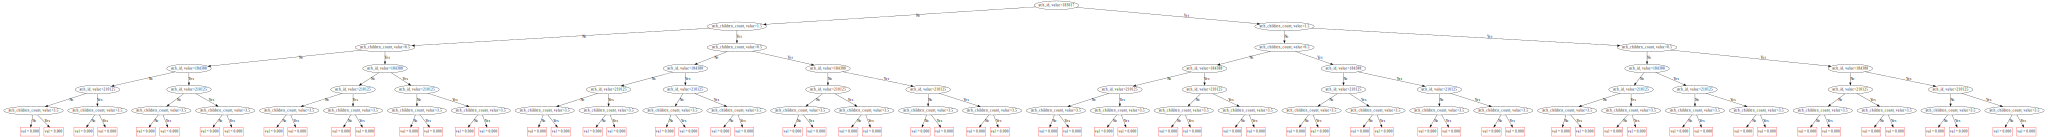

In [468]:
g = model.plot_tree(
    tree_idx=0,
    pool=val_pool
)
g

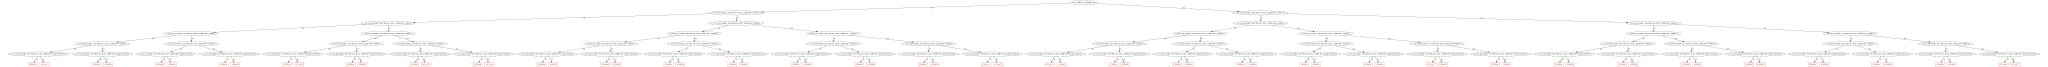

In [372]:
g = model.plot_tree(
    tree_idx=model.tree_count_-1,
    pool=val_pool
)
g

In [27]:
# g.save('tree.pdf')

In [28]:
# from feature_importance import get_and_plot_feature_imp_catboost

# COLLECT_N_IMPORTANT_FEATURES = 150

# feature_score_SHAP, shap_values_raw = get_and_plot_feature_imp_catboost(model, X_val, y_val,
#                                                                         method='SHAP',
#                                                                         cat_features=CAT_FEATURES,
#                                                                         #                                                        plot_type='bar',
#                                                                         top_n=COLLECT_N_IMPORTANT_FEATURES)

# # important_features_collected.update(feature_score_SHAP.sort_values(
# #     ['Score'], ascending=False).values[:COLLECT_N_IMPORTANT_FEATURES, 0])

In [29]:
# pd.set_option('max_rows', None)
# feature_score_SHAP.sort_values('Score', ascending=False)

# shap_values_raw

features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

In [28]:
import shap
shap.initjs()

explainer = shap.Explainer(model)
shap_values = explainer(X_val) # X_val or val_pool

We can also just take the mean absolute value of the SHAP values for each feature to get a standard bar plot (produces stacked bars for multi-class outputs):

In [29]:
pd.concat([X_train, y_train], axis=1).groupby(group_col)['target'].nunique().value_counts()

1    34365
2      376
3        1
Name: target, dtype: int64

In [31]:
pd.concat([X_val, y_val], axis=1).groupby(group_col)['target'].apply(list).sample(10)

srch_id
106781       [0]
158881       [0]
91701        [0]
261131       [0]
255371       [0]
14051     [0, 0]
35201        [0]
176131       [0]
222561       [0]
167031       [0]
Name: target, dtype: object

In [32]:
pd.Series(model.predict(val_pool)).value_counts()

-0.581399    2
-0.547249    1
-0.576629    1
-0.572523    1
-0.590653    1
-0.474462    1
-0.584685    1
-0.551648    1
-0.619420    1
-0.588852    1
-0.540191    1
-0.565701    1
-0.539387    1
-0.668213    1
-0.566446    1
-0.509630    1
-0.571885    1
 4.989803    1
-0.493565    1
-0.589683    1
-0.609194    1
-0.587060    1
-0.539451    1
-0.557658    1
-0.568449    1
-0.543777    1
-0.529862    1
-0.596979    1
-0.575502    1
-0.581250    1
 4.247533    1
-0.573875    1
-0.566580    1
-0.582296    1
-0.577231    1
-0.579035    1
-0.583095    1
-0.608432    1
-0.478273    1
-0.577482    1
-0.584820    1
-0.612800    1
-0.575251    1
-0.627601    1
-0.590950    1
-0.617203    1
-0.578458    1
-0.597381    1
-0.596152    1
-0.514754    1
-0.588779    1
-0.592033    1
-0.580025    1
 3.821886    1
-0.515376    1
-0.525323    1
-0.583871    1
-0.541894    1
-0.585808    1
-0.604305    1
-0.565033    1
-0.590280    1
-0.550050    1
-0.591010    1
-0.594374    1
-0.530140    1
-0.523189 

In [34]:
pd.set_option('max_rows', None)
pd.set_option('display.max_colwidth', None)

import numpy as np
features = X_val.columns
mean_shaps = np.abs(shap_values.values).mean(0)
# mask = mean_shaps.argsort()[::-1]
# features[mask]
shaps_df = pd.DataFrame({'feature': features, 'shap': mean_shaps})
# shaps_df = shaps_df[shaps_df['shap'] < 0.001]
shaps_df[shaps_df['feature'].isin(cols_to_use)].sort_values('shap', ascending=False)#.head(20)['feature'].values

feature  \
97                                                                                                                                           click_prob_train   
98                                                                                                                                             book_per_click   
96                                                                                                                                         booking_prob_train   
273                                                            price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_starrating   
231                                                                                                   price_per_day_rel_diff_to_max_price_per_day_per_prop_id   
36                                                                                                                             comp5_rate_percent_diff_signed   
94                                                                                                                                    price_index_per_prop_id   
32                                                                                                                               prop_location_score_diff_log   
1                                                                                                                                                     srch_id   
43                                                                                                                       prop_log_historical_price_reciprocal   
229                                                                                                   price_per_day_rel_diff_to_min_price_per_day_per_prop_id   
241                                                                   price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_id   
228                                                                                                       price_per_day_diff_to_min_price_per_day_per_prop_id   
274                                                        price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_starrating   
238                                                                    price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_id   
226                                                                                                    price_per_day_diff_to_median_price_per_day_per_prop_id   
221                                                                                                                          median_price_per_day_per_prop_id   
181                               price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter   
269                                                                                  median_price_per_day_per_visitor_location_country_id_per_prop_starrating   
287                                       price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating   
206                               price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter   
275                                                               price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_starrating   
214                                        price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter   
239                                                                price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_id   
290                                                                                             max_price_per_day_per_srch_de

In [35]:
shaps_df['per_col'] = shaps_df['feature'].apply(lambda x: ''.join(x.split('per_')[1:]))
shaps_df[shaps_df['per_col'] != ''].sort_values(['per_col', 'shap']).drop(['per_col'], axis=1)

feature  \
85                                                                                                                                                  children_per_adult   
98                                                                                                                                                      book_per_click   
26                                                                                                                                                       price_per_day   
230                                                                                                                price_per_day_diff_to_max_price_per_day_per_prop_id   
260                                                                                    price_per_day_diff_to_max_price_per_day_per_prop_id_per_trip_start_date_quarter   
359                                                                                             price_per_day_diff_to_max_price_per_day_per_prop_location_score2_round   
194                                                                                                    price_per_day_diff_to_max_price_per_day_per_srch_destination_id   
407                                                                     price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_prop_location_score2_round   
293                                                                                price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_prop_starrating   
431                                                 price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_location_score2_round   
346                                                          price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score   
311                                                            price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating   
218                                                    price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter   
419                                         price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_location_score2_round   
338                                                  price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score   
456                                                                                      price_per_day_diff_to_max_price_per_day_per_trip_start_date_month_per_prop_id   
170                                                                        price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_country_id   
182                                            price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter   
242                                                                                price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_id   
251                                                    price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_id_per_trip_start_date_quarter   
371                                                             price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_location_score2_round   
275                                                                        price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_starrating   
395                                     price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_location_score2_round   
287                                                price_per_day_diff_to_max_pr

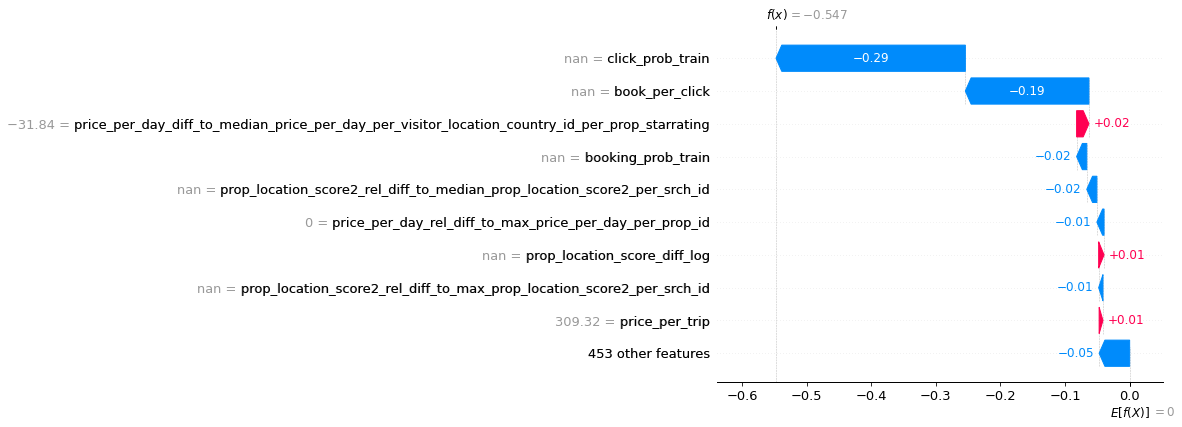

In [36]:
shap.plots.waterfall(shap_values[0])

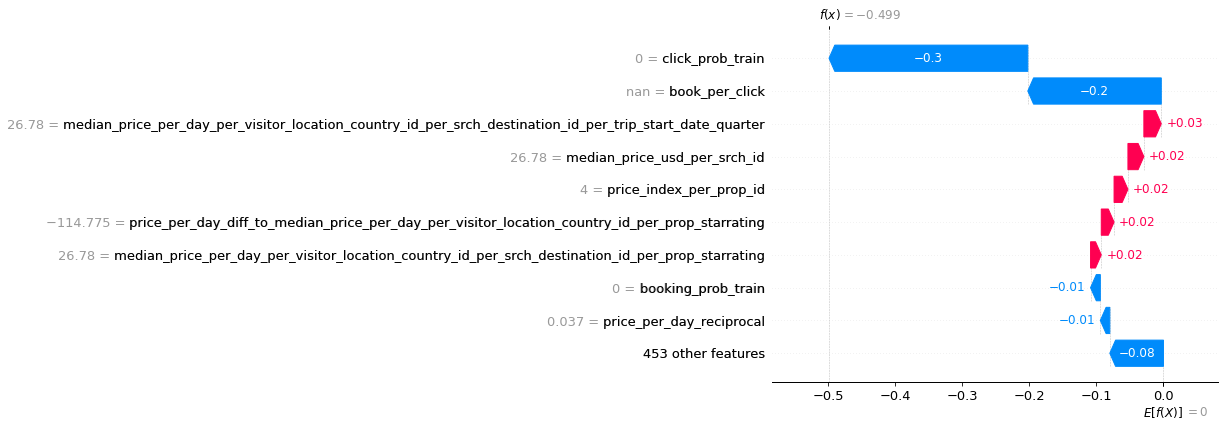

In [37]:
shap.plots.waterfall(shap_values[1])

In [38]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [39]:
shap.plots.force(shap_values[10])

In [40]:
# visualize all the training set predictions
shap.plots.force(shap_values[:100])

To understand how a single feature effects the output of the model we can plot the SHAP value of that feature vs. the value of the feature for all the examples in a dataset. Since SHAP values represent a feature's responsibility for a change in the model output. Vertical dispersion at a single value represents interaction effects with other features. To help reveal these interactions we can color by another feature. If we pass the whole explanation tensor to the color argument the scatter plot will pick the best feature to color by. 

In [381]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:100, "prop_location_score2"], color=shap_values[:100])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low).

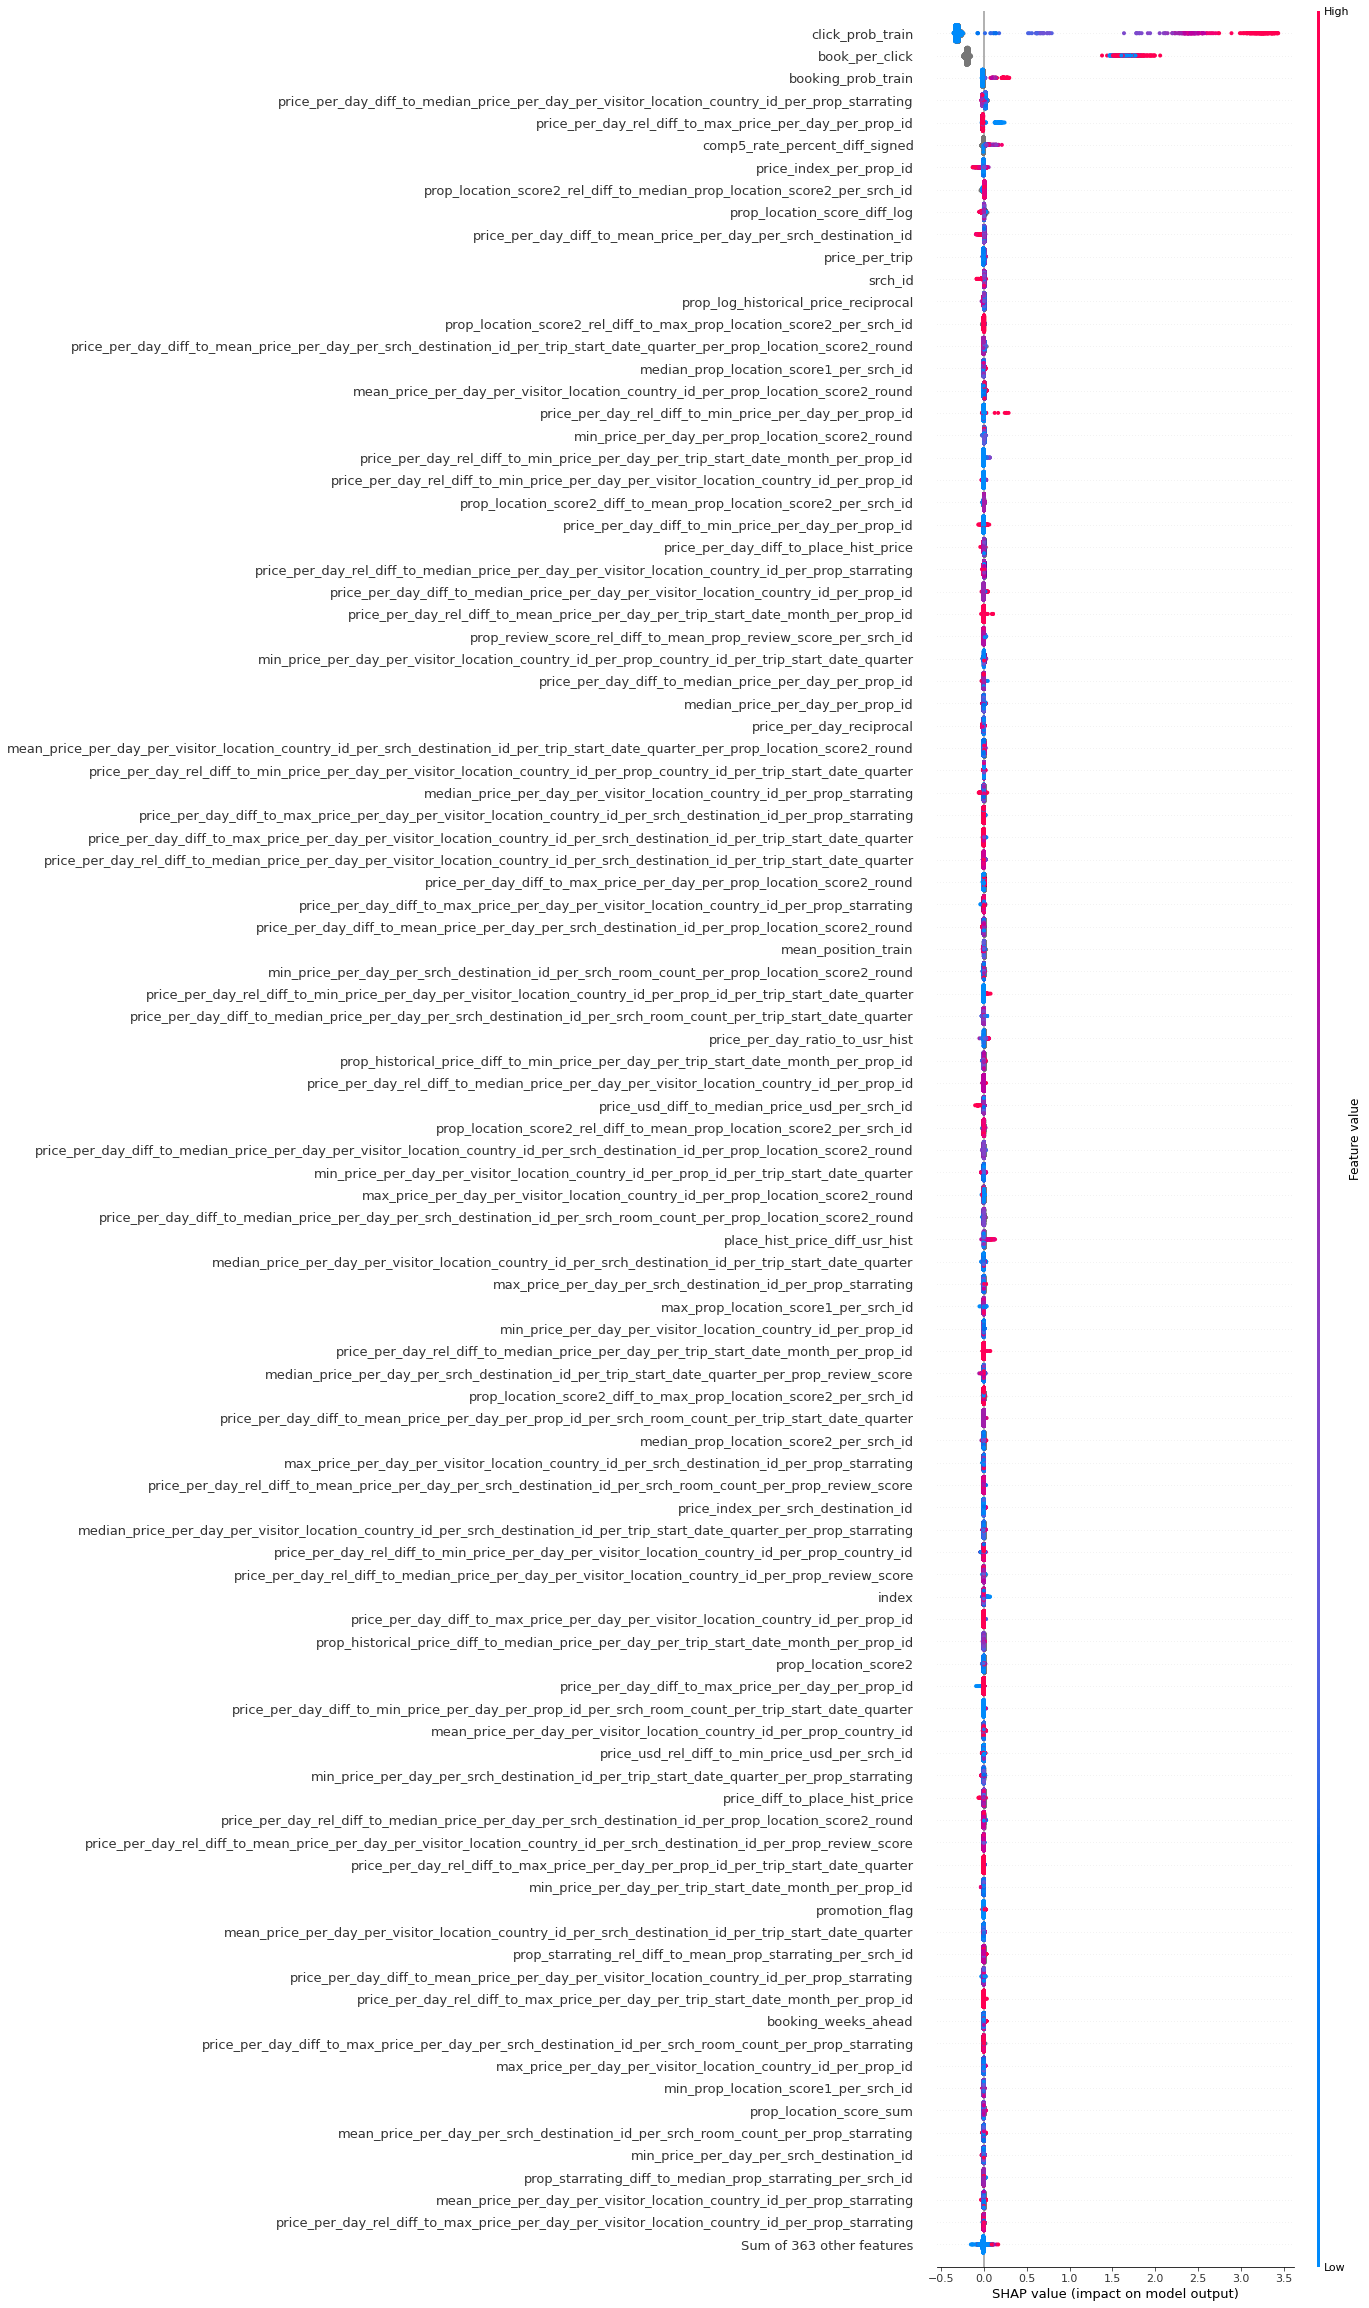

In [41]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values, max_display=100)

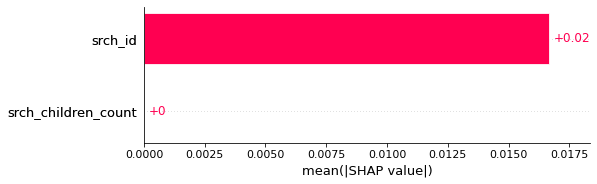

In [383]:
shap.plots.bar(shap_values, max_display=100)

SHAP interaction values are a generalization of SHAP values to higher order interactions. Fast exact computation of pairwise interactions are implemented for tree models with shap.TreeExplainer(model).shap_interaction_values(X). This returns a matrix for every prediction, where the main effects are on the diagonal and the interaction effects are off-diagonal. These values often reveal interesting hidden relationships

https://slundberg.github.io/shap/notebooks/plots/dependence_plot.html

In [ ]:
# explainer.shap_interaction_values(X_val.head(10))

In [ ]:
# feature_score_PredictionValuesChange = get_and_plot_feature_imp_catboost(
#         model, X_val, y_val,
#         cat_features=CAT_FEATURES,
#         method='PredictionValuesChange',
#         top_n=COLLECT_N_IMPORTANT_FEATURES)

#     important_features_collected.update(feature_score_PredictionValuesChange.sort_values(['Score'], ascending=False).values[:COLLECT_N_IMPORTANT_FEATURES, 0])

For each feature, LossFunctionChange represents the difference between the loss value of the model with this feature and without it.

+ more accurate than Prediction Values Change
+ more fast than Shap Values
- assumes that loss function changes for several features can be summed up

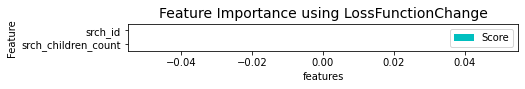

In [384]:
import matplotlib.pyplot as plt

for method in ['LossFunctionChange']:
    fi = model.get_feature_importance(val_pool, type=method)
    feature_score_raw = pd.DataFrame(list(zip(X_val.columns, fi)),
                                     columns=['Feature', 'Score'])

    feature_score = feature_score_raw.sort_values(
        by='Score', ascending=False)

    plt.rcParams["figure.figsize"] = (7, len(feature_score) / 4)
    ax = feature_score.plot('Feature', 'Score', kind='barh', color='c')
    ax.set_title("Feature Importance using {}".format(method), fontsize=14)
    ax.set_xlabel("features")
    ax.invert_yaxis()
    plt.show()

In [ ]:
feature_score.sort_values('Feature')

In [ ]:
feature_score['per_col'] = feature_score['Feature'].apply(lambda x: ''.join(x.split('per_')[1:]))
feature_score[feature_score['per_col'] != ''].sort_values('per_col').drop(['per_col'], axis=1)